In [2]:
#1. Prachi - 
# Box Office Performance and Awards:

# IMDb rating is based on a scale of 1–10, with 1 being the worst and 10 being the best.

# 1st Question: What are the average box office film revenues by year, and how do these revenues correlate with critical rating?

# Answer: The average box office film revenue is 39.664243 million. 
#There are several reasons why Box Office revenue has increased over the years, including: Technological advancements like high-quality sound systems, 3D and IMAX screens, and comfortable seating have made the movie-going experience more immersive. Also, Globalization: The film industry become more global, with Hollywood blockbusters released in multiple countries simultaneously.   
# 1.2 Average Total Awards by Year: Average film Awards may increase by year for a number of reasons, including New categories - Award shows may add new categories to recognize a wider range of genres and achievements. For example, the Oscars announced plans to add Best Casting category in 2025. 2. Fan-voted categories: Some award shows have introduced fan-voted categories to make the awards more relevant to younger audiences. For example, the Academy Awards introduced two fan-voted categories in 2022.

#2 - how do these revenues correlate with critical rating? Answer: As we can see from the graph Box Office revenue is typically increasing as the IMDB Rating increases. Although there are outliers which show opposite trend. For example, IMDB rating of 1.7 has about 73.01 million in revenue when compared to IMDB rating of 9.3 which has 28.76 million in revenue. Low IMDB rating with high revenue may happen when moviegoers go watch famous actor/actress however, the movie itself is of low quality. 
#one reason could be consumer preferences: Moviegoers prefer big-budget films with special effects and immersive experiences.

#2.2 Imdb Rating vs Total Awards: General trend is that imdbRating is increasing as the movies are nominated for many categories and win more Awards.





In [3]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import json
import re
import seaborn as sns

In [4]:
# Read the CSV file
merged_df = pd.read_csv("merged_df.csv")
#Display Columns
merged_df.columns

Index(['imdb_id', 'id', 'release_date', 'runtime', 'title', 'cast', 'crew',
       'Year', 'Rated', 'Genre', 'Language', 'Country', 'Awards', 'imdbRating',
       'imdbVotes', 'BoxOffice', 'Total Awards', 'Decade', 'Season_of_Year',
       'BoxOffice_millions'],
      dtype='object')

In [ ]:
# Subtask 1.2: Inspect the Dataframe

In [5]:
# Check the column-wise info of the dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6391 entries, 0 to 6390
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   imdb_id             6391 non-null   object 
 1   id                  6391 non-null   int64  
 2   release_date        6391 non-null   object 
 3   runtime             6391 non-null   float64
 4   title               6391 non-null   object 
 5   cast                6391 non-null   object 
 6   crew                6391 non-null   object 
 7   Year                6391 non-null   float64
 8   Rated               6391 non-null   object 
 9   Genre               6391 non-null   object 
 10  Language            6391 non-null   object 
 11  Country             6391 non-null   object 
 12  Awards              5456 non-null   object 
 13  imdbRating          6391 non-null   float64
 14  imdbVotes           6391 non-null   float64
 15  BoxOffice           6391 non-null   float64
 16  Total 

In [6]:
# Check the summary for the numeric columns 
merged_df.describe()

,id,runtime,Year,imdbRating,imdbVotes,BoxOffice,Total Awards,Decade,BoxOffice_millions
count,6391.000000,6391.000000,6391.000000,6391.000000,6.391000e+03,6.391000e+03,6391.000000,6391.000000,6391.000000
mean,52158.398373,106.051479,1999.762478,6.316148,1.078178e+05,3.966424e+07,17.370521,1995.355969,39.664243
std,86310.902137,18.037919,10.341171,0.971229,2.044017e+05,6.078072e+07,40.093765,10.494541,60.780716
min,5.000000,0.000000,1980.000000,1.300000,2.620000e+02,1.000229e+06,0.000000,1980.000000,1.000229
25%,9606.000000,94.000000,1991.000000,5.700000,1.045050e+04,5.927828e+06,1.000000,1990.000000,5.927829
50%,15365.000000,103.000000,2000.000000,6.400000,3.693100e+04,1.830261e+07,5.000000,2000.000000,18.302607
75%,45095.000000,115.000000,2008.000000,7.000000,1.132755e+05,4.738490e+07,15.000000,2000.000000,47.384895
max,443319.000000,357.000000,2017.000000,9.300000,2.932194e+06,9.366622e+08,584.000000,2010.000000,936.662225


In [7]:
merged_df.head(2)

,imdb_id,id,release_date,runtime,title,cast,crew,Year,Rated,Genre,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Total Awards,Decade,Season_of_Year,BoxOffice_millions
0,tt0114709,862,1995-10-30,81.0,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995.0,G,"Animation, Adventure, Comedy",English,United States,Nominated for 3 Oscars. 29 wins & 24 nominatio...,8.3,1084764.0,223225679.0,56,1990,Fall,223.225679
1,tt0113497,8844,1995-12-15,104.0,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995.0,PG,"Adventure, Comedy, Family","English, French",United States,4 wins & 11 nominations,7.1,382657.0,100499940.0,15,1990,Winter,100.499940


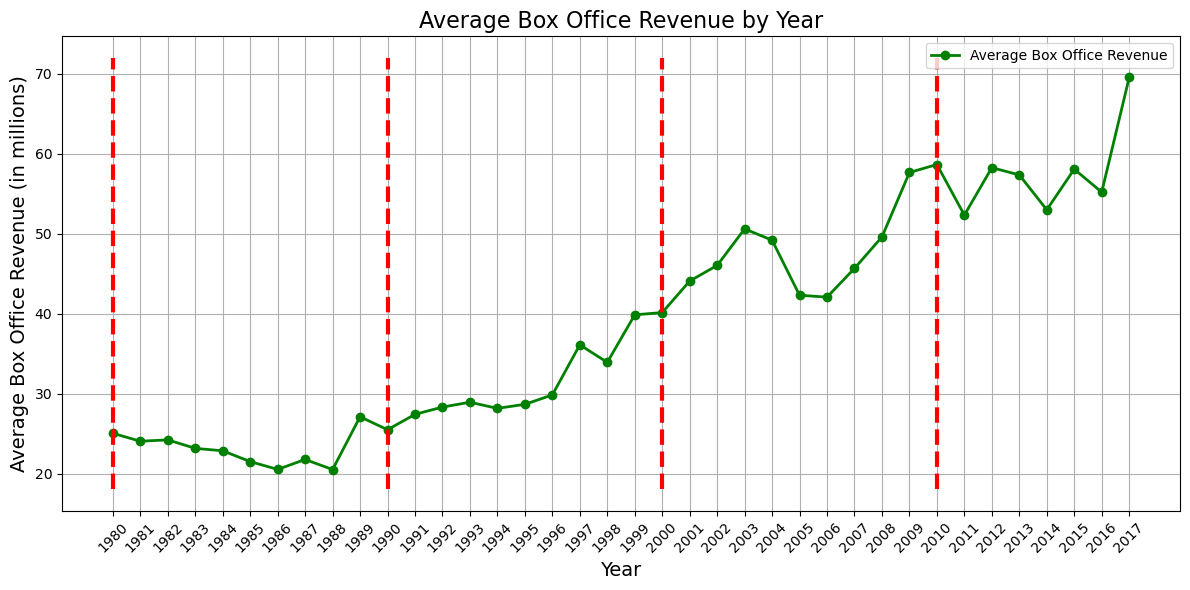

In [8]:
# 1. Box Office and Total Awards:

# Start Visualizing:

#Average Box Office Revenue by Year

# Group by Year and calculate the mean BoxOffice_millions
boxoffice_grouped_df = merged_df.groupby('Year')['BoxOffice_millions'].mean()

plt.figure(figsize=(12, 6))

# Plotting the average BoxOffice_millions with improved aesthetics
plt.plot(boxoffice_grouped_df.index, boxoffice_grouped_df, label='Average Box Office Revenue', 
         color='green', marker='o', markersize=6, linewidth=2)

# List of decades
decade_starts = [1980, 1990, 2000, 2010]

# Adding vertical lines for the start of each decade

# Add vertical lines for each decade
plt.vlines(decade_starts, *plt.ylim(), color='red', linestyle='--', linewidth=3)

# Adding titles and labels
plt.title('Average Box Office Revenue by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Box Office Revenue (in millions)', fontsize=14)
plt.xticks(boxoffice_grouped_df.index, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Add a grid for better visibility

plt.tight_layout()  # Adjust layout to fit labels

# Save the plot as an image
plt.savefig('average_box_office _Revenue_by_year.png')  # Save as PNG

# Show plot
plt.show()

In [ ]:
#1B. What are the average box office film revenues by year, and how do these revenues correlate with critical rating?
#. imdbRating vs total awards

In [25]:
boxoffice_grouped_df

imdbRating
1.3      2.783970
1.5      9.219388
1.6     12.684653
1.7     73.013910
1.9      9.559892
          ...    
8.7    142.013506
8.8    251.397906
8.9    213.650420
9.0    337.921371
9.3     28.767189
Name: BoxOffice_millions, Length: 76, dtype: float64

In [26]:
type(boxoffice_grouped_df)

pandas.core.series.Series

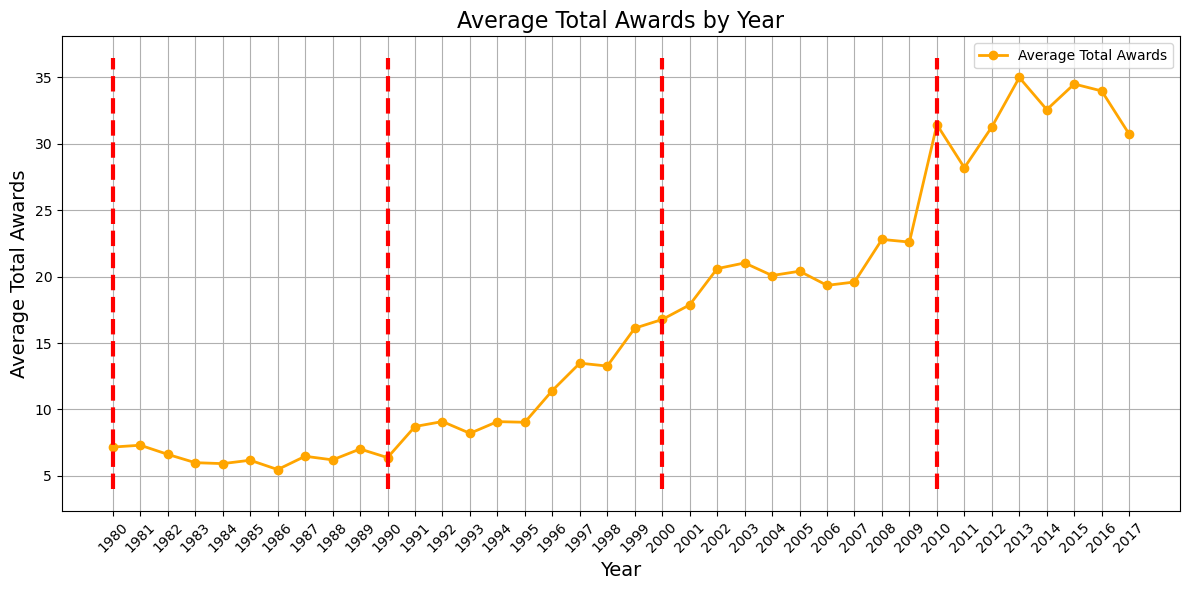

In [8]:
# 2. Average Total Awards by Year

# Group by Year and calculate the mean Total Awards
awards_grouped_df = merged_df.groupby('Year')['Total Awards'].mean()

plt.figure(figsize=(12, 6))

# Plotting the average Total Awards with improved aesthetics
plt.plot(awards_grouped_df.index, awards_grouped_df, label='Average Total Awards', 
         color='#FFA500', marker='o', markersize=6, linewidth=2)

# Adding vertical lines for the start of each decade
# List of decades
decade_starts = [1980, 1990, 2000, 2010]
# Add vertical lines for each decade
plt.vlines(decade_starts, *plt.ylim(), color='red', linestyle='--', linewidth=3)

# Adding titles and labels
plt.title('Average Total Awards by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Total Awards', fontsize=14)
plt.xticks(awards_grouped_df.index, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Add a grid for better visibility

plt.tight_layout()  # Adjust layout to fit labels

# Save the plot as an image
#plt.savefig('output/average_total_awards_by_year.png')  # Save as PNG

# Show plot
plt.show()

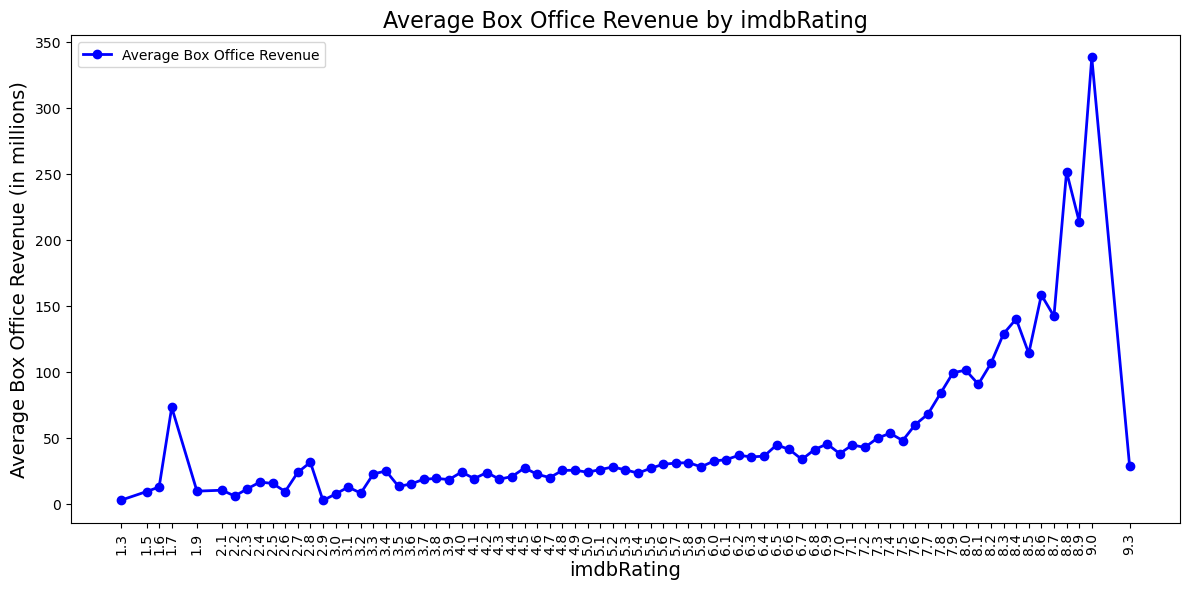

In [76]:
#3. Average Box Office Revenue vs imdbRating 




# Prepare the data
boxoffice_grouped_s = merged_df.groupby('imdbRating')['BoxOffice_millions'].mean()

plt.figure(figsize=(12, 6))

# Plotting the average BoxOffice_millions with improved aesthetics
plt.plot(boxoffice_grouped_s.index, boxoffice_grouped_s, label='Average Box Office Revenue', 
         color='blue', marker='o', markersize=6, linewidth=2)



# 

# Add vertical lines for each decade
#plt.vlines(imdbRating, *plt.ylim(), color='red', linestyle='--', linewidth=3)

# Adding titles and labels
plt.title('Average Box Office Revenue by imdbRating', fontsize=16)
plt.xlabel('imdbRating', fontsize=14)
plt.ylabel('Average Box Office Revenue (in millions)', fontsize=14)
plt.xticks(boxoffice_grouped_s.index, rotation=90)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
#plt.grid(True)  # Add a grid for better visibility

plt.tight_layout()  # Adjust layout to fit labels

# Save the plot as an image
plt.savefig('average_box_office_Revenue_by_imdbRating.png')  # Save as PNG

# Show plot
plt.show()

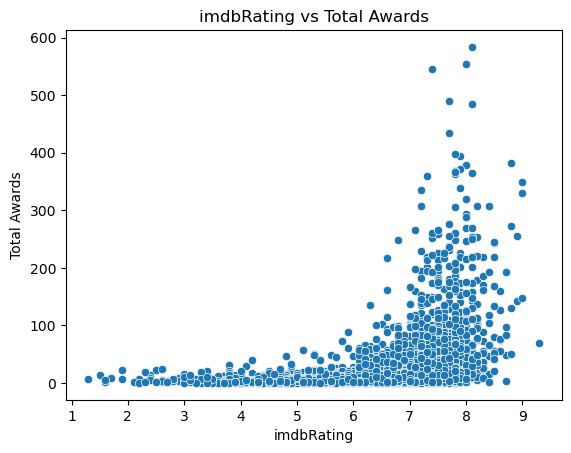

In [98]:
# # 4. imdbRating vs total awards 


#Plot ImdbRating vs Total_Awards
sns.scatterplot(data = merged_df, x = "imdbRating", y = "Total Awards")

# Save the plot as an image
plt.savefig('imdbRating_by_Total_Awards.png')  # Save as PNG

plt.title('imdbRating vs Total Awards')

plt.show()

In [93]:
merged_df.describe()

,id,runtime,Year,imdbRating,imdbVotes,BoxOffice,Total Awards,Decade,BoxOffice_millions
count,6391.000000,6391.000000,6391.000000,6391.000000,6.391000e+03,6.391000e+03,6391.000000,6391.000000,6391.000000
mean,52158.398373,106.051479,1999.762478,6.316148,1.078178e+05,3.966424e+07,17.370521,1995.355969,39.664243
std,86310.902137,18.037919,10.341171,0.971229,2.044017e+05,6.078072e+07,40.093765,10.494541,60.780716
min,5.000000,0.000000,1980.000000,1.300000,2.620000e+02,1.000229e+06,0.000000,1980.000000,1.000229
25%,9606.000000,94.000000,1991.000000,5.700000,1.045050e+04,5.927828e+06,1.000000,1990.000000,5.927829
50%,15365.000000,103.000000,2000.000000,6.400000,3.693100e+04,1.830261e+07,5.000000,2000.000000,18.302607
75%,45095.000000,115.000000,2008.000000,7.000000,1.132755e+05,4.738490e+07,15.000000,2000.000000,47.384895
max,443319.000000,357.000000,2017.000000,9.300000,2.932194e+06,9.366622e+08,584.000000,2010.000000,936.662225


In [39]:
pd.set_option('display.max_rows', 100)

In [40]:
totalawards_by_imdbrating_s.head(76)

imdbRating
1.3      6.000000
1.5     13.000000
1.6      3.000000
1.7      8.000000
1.9     14.500000
2.1      2.000000
2.2      3.500000
2.3     10.500000
2.4      8.666667
2.5     11.500000
2.6      8.750000
2.7      3.000000
2.8      4.666667
2.9      6.000000
3.0      5.714286
3.1      6.800000
3.2      3.000000
3.3      6.833333
3.4      6.700000
3.5      2.900000
3.6      4.142857
3.7      4.416667
3.8      7.722222
3.9      3.473684
4.0      5.090909
4.1      4.214286
4.2      4.821429
4.3      2.966667
4.4      3.405405
4.5      3.736842
4.6      3.209302
4.7      3.432836
4.8      3.611111
4.9      4.313433
5.0      3.363636
5.1      3.494505
5.2      3.040816
5.3      3.610687
5.4      3.474026
5.5      3.220930
5.6      4.222222
5.7      3.900000
5.8      4.485437
5.9      4.103448
6.0      4.341969
6.1      5.088710
6.2      6.297872
6.3      7.135531
6.4      7.750820
6.5      8.251773
6.6     11.110368
6.7     11.192171
6.8     15.024896
6.9     15.469027
7.0     18.457014